In [104]:
import pandas as pd
df = pd.read_csv("Cric.csv")
df

,Name,Runs,Wickets
0,Player 01,10000,12
1,Player 02,7500,10
2,Player 03,150000,15
3,Player 04,4500,5
4,Player 05,3000,2
5,Player 06,2500,1
6,Player 07,3000,100
7,Player 08,550,250
8,Player 09,450,450
9,Player 10,400,500


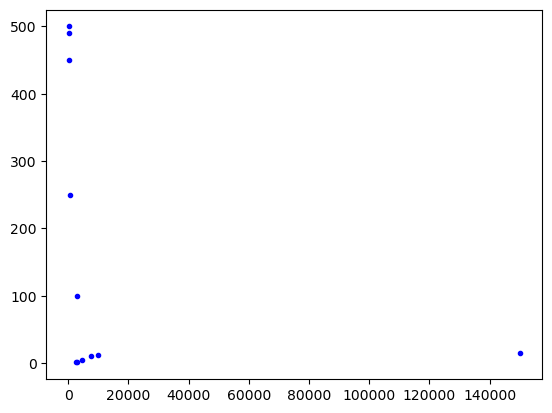

In [105]:
import matplotlib.pyplot as plt
plt.scatter(df['Runs'],df['Wickets'],marker = '.',color='blue')

In [106]:
from sklearn.cluster import KMeans

In [107]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [108]:
out = km.fit_predict(df[['Runs','Wickets']])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
out

array([2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
df['clusters'] = out
df

,Name,Runs,Wickets,clusters
0,Player 01,10000,12,2
1,Player 02,7500,10,2
2,Player 03,150000,15,1
3,Player 04,4500,5,0
4,Player 05,3000,2,0
5,Player 06,2500,1,0
6,Player 07,3000,100,0
7,Player 08,550,250,0
8,Player 09,450,450,0
9,Player 10,400,500,0


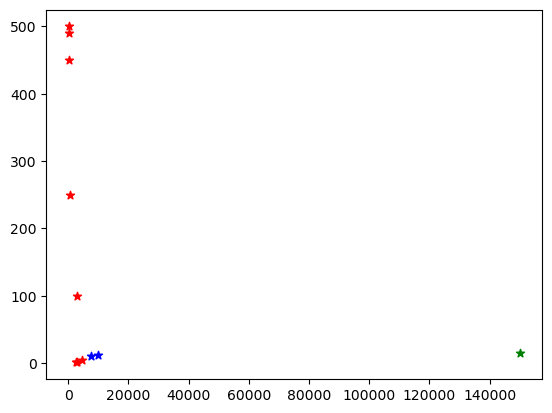

In [111]:
df0 = df[df['clusters']==0]
df1 = df[df['clusters']==1]
df2 = df[df['clusters']==2]
plt.scatter(df0['Runs'],df0['Wickets'],marker='*',color='red')
plt.scatter(df1['Runs'],df1['Wickets'],marker='*',color='green')
plt.scatter(df2['Runs'],df2['Wickets'],marker='*',color='blue')

In [112]:
km.cluster_centers_

array([[1.83125e+03, 2.24750e+02],
       [1.50000e+05, 1.50000e+01],
       [8.75000e+03, 1.10000e+01]])

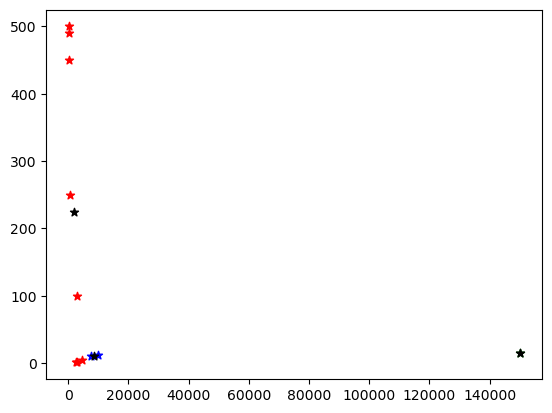

In [113]:
plt.scatter(df0['Runs'],df0['Wickets'],marker='*',color='red')
plt.scatter(df1['Runs'],df1['Wickets'],marker='*',color='green')
plt.scatter(df2['Runs'],df2['Wickets'],marker='*',color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker='*')

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scl = MinMaxScaler()
scl.fit(df[['Runs']])
df['Runs']=scl.transform(df[['Runs']])
scl.fit(df[['Wickets']])
df['Wickets']=scl.transform(df[['Wickets']])
df

,Name,Runs,Wickets,clusters
0,Player 01,0.065109,0.022044,2
1,Player 02,0.048414,0.018036,2
2,Player 03,1.000000,0.028056,1
3,Player 04,0.028381,0.008016,0
4,Player 05,0.018364,0.002004,0
5,Player 06,0.015025,0.000000,0
6,Player 07,0.018364,0.198397,0
7,Player 08,0.002003,0.498998,0
8,Player 09,0.001336,0.899800,0
9,Player 10,0.001002,1.000000,0


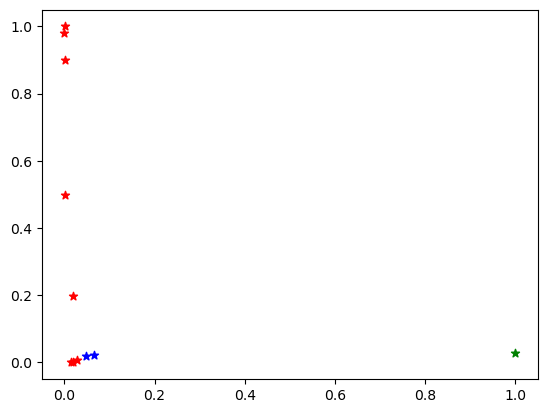

In [116]:
df0 = df[df['clusters']==0]
df1 = df[df['clusters']==1]
df2 = df[df['clusters']==2]
plt.scatter(df0['Runs'],df0['Wickets'],marker='*',color='red')
plt.scatter(df1['Runs'],df1['Wickets'],marker='*',color='green')
plt.scatter(df2['Runs'],df2['Wickets'],marker='*',color='blue')

In [120]:
km1 = KMeans(n_clusters=3)
out1 = km1.fit_predict(df[['Runs','Wickets']])
out1

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1])

In [124]:
df['Target'] = out1
df

,Name,Runs,Wickets,clusters,Target
0,Player 01,0.065109,0.022044,2,0
1,Player 02,0.048414,0.018036,2,0
2,Player 03,1.000000,0.028056,1,2
3,Player 04,0.028381,0.008016,0,0
4,Player 05,0.018364,0.002004,0,0
5,Player 06,0.015025,0.000000,0,0
6,Player 07,0.018364,0.198397,0,0
7,Player 08,0.002003,0.498998,0,1
8,Player 09,0.001336,0.899800,0,1
9,Player 10,0.001002,1.000000,0,1


In [ ]:
li = ['Batsman','Bowler','Allrounder']

In [159]:
df['Output'] = df['Target'].apply(lambda x : li[x])
df

,Name,Runs,Wickets,clusters,Target,Output
0,Player 01,0.065109,0.022044,2,0,Batsman
1,Player 02,0.048414,0.018036,2,0,Batsman
2,Player 03,1.000000,0.028056,1,2,Allrounder
3,Player 04,0.028381,0.008016,0,0,Batsman
4,Player 05,0.018364,0.002004,0,0,Batsman
5,Player 06,0.015025,0.000000,0,0,Batsman
6,Player 07,0.018364,0.198397,0,0,Batsman
7,Player 08,0.002003,0.498998,0,1,Bowler
8,Player 09,0.001336,0.899800,0,1,Bowler
9,Player 10,0.001002,1.000000,0,1,Bowler


In [122]:
km.inertia_

21885719.0

In [170]:
sse = []
k_range = range(1,6)
for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['Runs','Wickets']])
    sse.append(km.inertia_)
sse

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

[2.72314761593836,
 0.9998070048347053,
 0.1969485467946812,
 0.03761071318925922,
 0.007806957117996227]

In [195]:
x = df.drop(columns = ['Name','clusters','Target','Output'])
y = df['Output']

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [197]:
len(x_train)

8

In [198]:
len(x_test)

3

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
model = KNeighborsClassifier(n_neighbors = 3)
model

KNeighborsClassifier(n_neighbors=3)

In [201]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [202]:
model.score(x_test,y_test)

1.0

In [203]:
model.score(x_train,y_train)

0.875

In [204]:
model.predict([[0.065109,0.022044]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Batsman'], dtype=object)